In [1]:
import numpy as np
from matplotlib import pyplot as plot
import pandas as pd
import seaborn as sns
from itertools import cycle

In [8]:
df = pd.read_excel('elife-63910-supp1-v2.xlsx', sheet_name='Fitness_Data')

In [9]:
generations = [70, 550, 1410, 2640, 3630, 5150, 7530, 10150]
generations_c = cycle(generations)

In [10]:
df2 = pd.concat([df]*len(generations), ignore_index=True)

In [11]:
df2['generation'] = [next(generations_c) for _ in range(len(df2))]

In [12]:
for p in df.platewell:
    for g in generations:
        df2.loc[(df2.platewell == p) & (df2.generation == g), 'fitness'] = df.loc[df.platewell == p]['Gen'+str(g)+'_s_scaled']

<AxesSubplot:xlabel='generation', ylabel='fitness'>

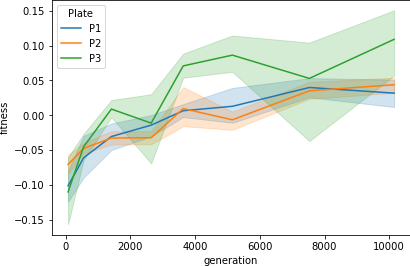

In [17]:
sns.lineplot(data=df2, x='generation', y='fitness', hue='Plate')

Next: compare with theoretical predictions!